## Will try to initiate an autoencoder in PyTorch
* Inspired by https://www.geeksforgeeks.org/implementing-an-autoencoder-in-pytorch/ *

In [1]:

import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt


### Autoencoder will learn an MNIST dataset and consequently will reproduce the number from MNIST

In [2]:
dataset = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = transforms.ToTensor()) #

In [3]:
train_set, test_set, valid_set =\
                torch.utils.data.random_split(dataset, (40000, 10000, 10000))

In [4]:
train_loader = torch.utils.data.DataLoader(dataset = train_set, batch_size = 32)
validation_loader = torch.utils.data.DataLoader(dataset = valid_set, batch_size = 32)
test_loader = torch.utils.data.DataLoader(dataset = test_set, batch_size = 32)

In [5]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
         
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 10
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 10)
        )
         
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 10 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(10, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

Just a function used for visualization

In [6]:
def plot_digits(*args): #just plotting the result

    n = min([x.shape[0] for x in args]) #n=5
    
    plt.figure(figsize=(2*n, 2*len(args))) #10 na 4
    for j in range(n): #j [1,2,3,4,5]
        for i in range(len(args)): #i [1,2]
            img=args[i][j].reshape(-1,28,28).detach().numpy()
            ax = plt.subplot(len(args), n, i*n + j + 1) #arguments: nrows, ncols, index
            plt.imshow(img[0])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [7]:
#blab lbalvsdbmsfdkmsal

In [89]:
model = AE()
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-2,
                             weight_decay = 1e-8)

In [92]:
epochs = 8
outputs = []
losses = []
val_losses=[]
for epoch in range(epochs):
    for (images_in_batch, _) in train_loader: 
        
# Reshaping the image to (-1, 784)
        images_in_batch = images_in_batch.reshape(-1, 28*28)
       
# Output of Autoencoder
        reconstructed = model(images_in_batch)
       
# Calculating the loss function
        loss = loss_function(reconstructed, images_in_batch)
       
# The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()   
        
# Storing the losses in a list for plotting
        losses.append(loss.detach().numpy()) #error at the end of the training on one batch := train_losses
    
# calculating validation loss (error for the last img of the batch)
        one_img=images_in_batch[-1]
        one_res=model(one_img)
        val_loss=loss_function(one_res, one_img)
        val_losses.append(val_loss.detach().numpy())
    outputs.append((epochs, image, reconstructed))

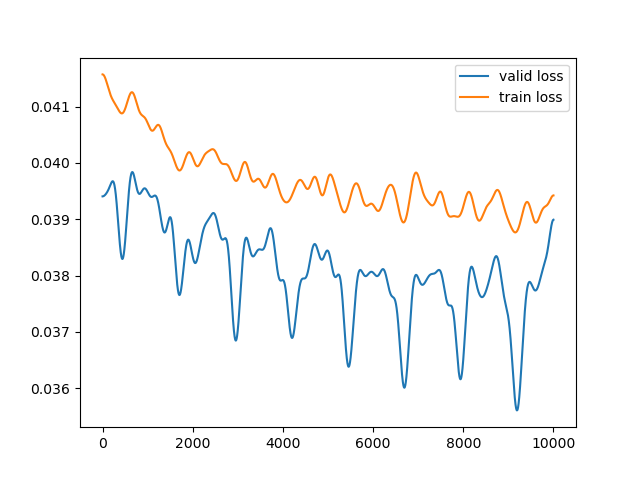

In [93]:
%matplotlib widget
import scipy
smooth_losses=scipy.ndimage.gaussian_filter(losses, 100) #because original losses are too noisy to see the pattern
smooth_val_losses=scipy.ndimage.gaussian_filter(val_losses, 100)

figs, axs = plt.subplots()
axs.plot(np.arange(0,len(losses)), smooth_val_losses, label='valid loss')
axs.plot(np.arange(0,len(losses)), smooth_losses, label='train loss')
axs.legend()

In [102]:
xbatch, ybatch =next(iter(test_loader))
xbatch=xbatch.reshape(-1,28*28)
a=[model(x) for x in xbatch[:5]]
a=torch.stack(a, dim=0)

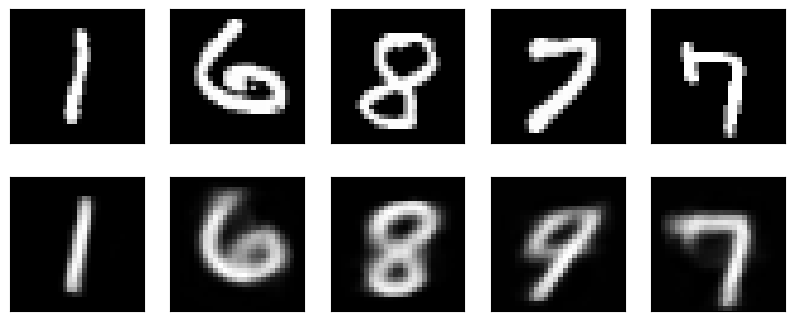

In [103]:
plot_digits(xbatch[:5], a)

- [ ] Strange course of validation and train losses (Have I implemented it correctly?)
- [ ] Find a way to use encoder and decoder separately
- [ ] use PT lightning?